In [1]:
#pacotes estatísitcos e de tratamento de dados
import pandas as pd
import numpy as np
import scipy.stats as stt

#pacotes gráficos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_material = pd.read_csv('../Base de dados/csv/metal_dataset.csv', sep = ',', header=0, na_values=True, index_col= False)

In [3]:
df_material.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Std             1552 non-null   object 
 1   ID              1552 non-null   object 
 2   Material        1552 non-null   object 
 3   Heat treatment  802 non-null    object 
 4   Su              1552 non-null   int64  
 5   Sy              1552 non-null   object 
 6   A5              1339 non-null   float64
 7   Bhn             463 non-null    float64
 8   E               1552 non-null   int64  
 9   G               1552 non-null   int64  
 10  mu              1552 non-null   float64
 11  Ro              1552 non-null   int64  
 12  pH              193 non-null    float64
 13  Desc            981 non-null    object 
 14  HV              165 non-null    float64
dtypes: float64(5), int64(4), object(6)
memory usage: 182.0+ KB


In [4]:
df_material.describe(include='all')

,Std,ID,Material,Heat treatment,Su,Sy,A5,Bhn,E,G,mu,Ro,pH,Desc,HV
count,1552,1552,1552,802,1552.000000,1552,1339.000000,463.000000,1552.000000,1552.000000,1552.000000,1552.000000,193.000000,981,165.000000
unique,8,1552,1225,44,NaN,291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83,NaN
top,ANSI,D8894772B88F495093C43AF905AB6373,Nodular cast iron,Wrought,NaN,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Heat-treatment steel,NaN
freq,622,1,20,203,NaN,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105,NaN
mean,NaN,NaN,NaN,NaN,572.753222,NaN,19.425243,177.138229,164571.520619,85598.840206,0.302977,6929.843428,627.393782,NaN,328.484848
std,NaN,NaN,NaN,NaN,326.834927,NaN,12.383319,113.508044,56135.405867,125326.800138,0.024590,2115.171710,370.530293,NaN,202.764089
min,NaN,NaN,NaN,NaN,69.000000,NaN,0.500000,19.000000,73000.000000,26000.000000,0.200000,1750.000000,190.000000,NaN,105.000000
25%,NaN,NaN,NaN,NaN,340.000000,NaN,11.000000,78.000000,105000.000000,40000.000000,0.300000,7160.000000,370.000000,NaN,192.000000
50%,NaN,NaN,NaN,NaN,500.000000,NaN,16.000000,170.000000,206000.000000,79000.000000,0.300000,7860.000000,460.000000,NaN,230.000000
75%,NaN,NaN,NaN,NaN,705.000000,NaN,24.750000,229.000000,206000.000000,80000.000000,0.320000,7860.000000,796.000000,NaN,492.000000


In [5]:
df_material.rename(columns = {'Heat treatment':'Tratamento'}, inplace = True)
print(df_material.columns)

Index(['Std', 'ID', 'Material', 'Tratamento', 'Su', 'Sy', 'A5', 'Bhn', 'E',
       'G', 'mu', 'Ro', 'pH', 'Desc', 'HV'],
      dtype='object')


In [6]:
print(df_material['Tratamento'].unique())

['as-rolled' 'normalized' 'annealed' 'tempered at 400 F'
 'tempered at 600 F' 'tempered at 800 F' '1/4-hard' '1/2-hard' '3/4-hard'
 'Full-hard' nan 'As hot rolled' 'As extruded' 'Cast (T7)' 'Cast (T4)'
 'Cast (F)' 'Cast (T61)' 'Cast (T77)' 'Cast (T6)' 'Cast (T62)'
 'Cast (T51)' 'Cast (T71)' 'Cast (F or T5)' 'Cast (T5)' 'Cast (T52)'
 'Cast (T53)' 'Wrought' 'sand casting' 'pressure die casting'
 'heat treated' 'case-hardened' 'face hardened' 'nitro-carburized'
 'nitro-case-hard.' 'nitrided' 'Heat-treatment nitrided steel'
 'Cold working' 'Annealing or high tempering' 'Improved'
 'Quenched and tempered' 'Quenching and cooling in the water'
 'Quenching and cooling in the oil' 'Quenching and heating'
 'Case hardening,quenching and cooling in the oil' 'Annealing']


In [8]:
print(df_material['Tratamento'].value_counts())

Tratamento
Wrought                                            203
normalized                                         152
Quenched and tempered                               71
annealed                                            66
heat treated                                        54
tempered at 400 F                                   29
Quenching and cooling in the oil                    25
case-hardened                                       22
sand casting                                        18
as-rolled                                           14
Quenching and cooling in the water                  13
Improved                                            12
As extruded                                         11
face hardened                                       10
Annealing or high tempering                          9
Cold working                                         9
Cast (T6)                                            8
Cast (F)                                             7

In [9]:
print(df_material.isnull().sum())

Std              0
ID               0
Material         0
Tratamento     750
Su               0
Sy               0
A5             213
Bhn           1089
E                0
G                0
mu               0
Ro               0
pH            1359
Desc           571
HV            1387
dtype: int64


Text(0.5, 0, 'Tratamento térmico')

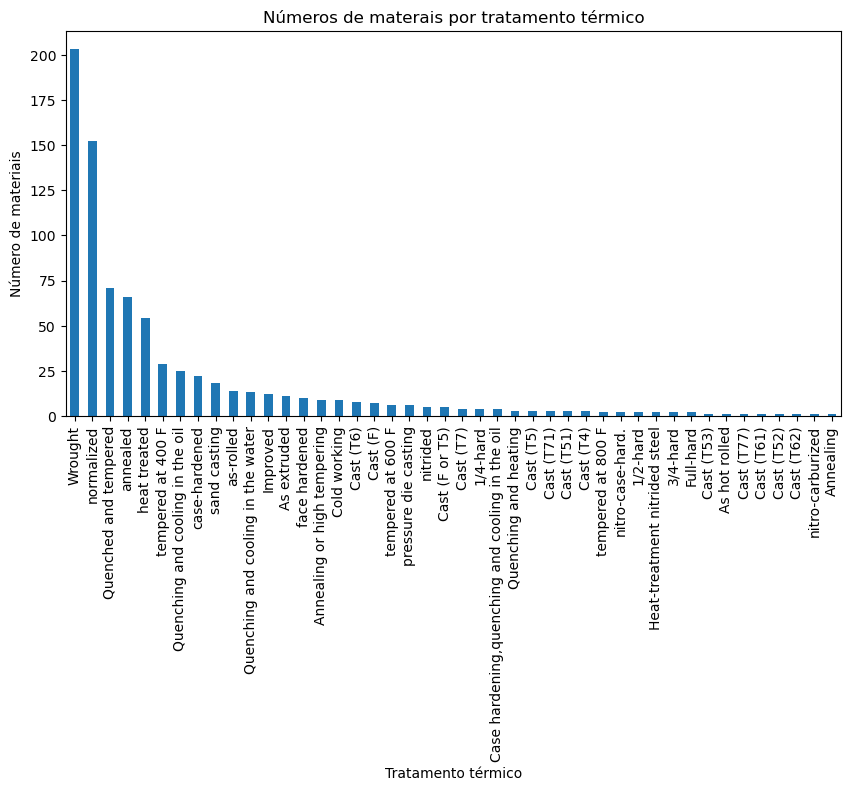

In [10]:
df_material['Tratamento'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Números de materais por tratamento térmico')
plt.ylabel('Número de materiais')
plt.xlabel('Tratamento térmico')

Text(0.5, 0, 'Padrões')

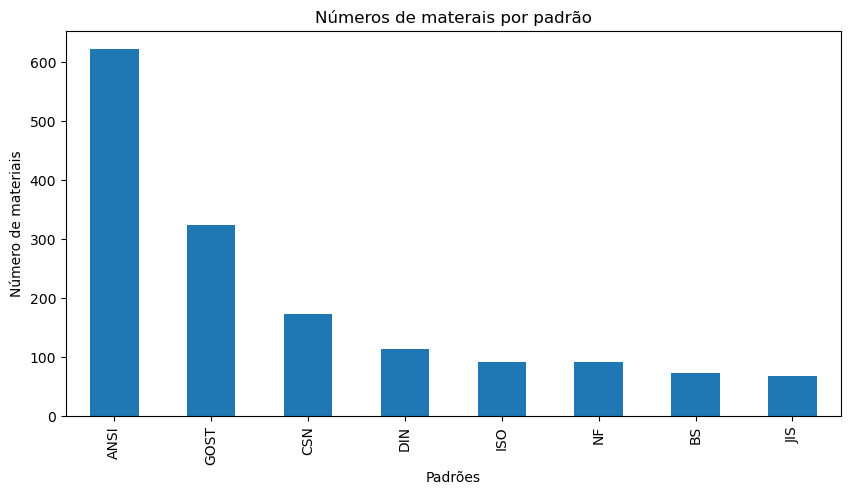

In [11]:
df_material['Std'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Números de materais por padrão')
plt.ylabel('Número de materiais')
plt.xlabel('Padrões')

In [12]:
df_material['Tratamento'].fillna('Desconhecido', inplace = True)


In [13]:
print(len(df_material))
print(df_material['Tratamento'].unique())

1552
['as-rolled' 'normalized' 'annealed' 'tempered at 400 F'
 'tempered at 600 F' 'tempered at 800 F' '1/4-hard' '1/2-hard' '3/4-hard'
 'Full-hard' 'Desconhecido' 'As hot rolled' 'As extruded' 'Cast (T7)'
 'Cast (T4)' 'Cast (F)' 'Cast (T61)' 'Cast (T77)' 'Cast (T6)' 'Cast (T62)'
 'Cast (T51)' 'Cast (T71)' 'Cast (F or T5)' 'Cast (T5)' 'Cast (T52)'
 'Cast (T53)' 'Wrought' 'sand casting' 'pressure die casting'
 'heat treated' 'case-hardened' 'face hardened' 'nitro-carburized'
 'nitro-case-hard.' 'nitrided' 'Heat-treatment nitrided steel'
 'Cold working' 'Annealing or high tempering' 'Improved'
 'Quenched and tempered' 'Quenching and cooling in the water'
 'Quenching and cooling in the oil' 'Quenching and heating'
 'Case hardening,quenching and cooling in the oil' 'Annealing']


In [14]:
df_material_tratado = df_material
df_base = df_material

In [18]:
df_material_tratado = df_material.drop_duplicates(keep='first')
df_material_tratado['Material'] = df_material_tratado[['Std', 'Material']].fillna('').agg(' '.join, axis = 1)
df_material_tratado.drop(['Desc','ID'], axis = 1, inplace = True)
df_material_tratado.fillna(0, inplace=True)
df_material_tratado.head(5)

1552


In [19]:
print(len(df_material_tratado))
print(df_material_tratado['Std'].value_counts())

1552
Std
ANSI    622
GOST    323
CSN     172
DIN     114
ISO      91
NF       91
BS       72
JIS      67
Name: count, dtype: int64


In [20]:
df_material_tratado['Sy'] = df_material_tratado['Sy'].str.replace(' max', '').astype(int)

In [21]:
len(df_material_tratado)

1552

Análise estatística dados dados

In [23]:
df_numeros = df_material_tratado
df_numeros['Std'] = df_numeros[['Std', 'Material', 'Tratamento']].fillna('').agg(' '.join, axis = 1)
df_numeros.drop(['Material', 'Tratamento'], axis = 1, inplace=True)
df_numeros = df_numeros.set_index('Std')
df_numeros.head(5)

,Su,Sy,A5,Bhn,E,G,mu,Ro,pH,HV
Std,,,,,,,,,,
ANSI ANSI Steel SAE 1015 as-rolled,421,314,39.0,126.0,207000,79000,0.3,7860,0.0,0.0
ANSI ANSI Steel SAE 1015 normalized,424,324,37.0,121.0,207000,79000,0.3,7860,0.0,0.0
ANSI ANSI Steel SAE 1015 annealed,386,284,37.0,111.0,207000,79000,0.3,7860,0.0,0.0
ANSI ANSI Steel SAE 1020 as-rolled,448,331,36.0,143.0,207000,79000,0.3,7860,0.0,0.0
ANSI ANSI Steel SAE 1020 normalized,441,346,35.8,131.0,207000,79000,0.3,7860,550.0,0.0


In [24]:
df_corr_pearson = df_numeros.corr()

In [25]:
df_corr_pearson

,Su,Sy,A5,Bhn,E,G,mu,Ro,pH,HV
Su,1.000000,0.957244,-0.212676,0.402712,0.594348,0.254508,-0.239663,0.407995,0.151894,0.177729
Sy,0.957244,1.000000,-0.337007,0.382471,0.472434,0.179293,-0.190256,0.273860,0.156312,0.183353
A5,-0.212676,-0.337007,1.000000,-0.050868,0.075470,0.194725,0.255540,0.290357,-0.224344,-0.212291
Bhn,0.402712,0.382471,-0.050868,1.000000,0.183929,0.243444,-0.116982,0.052230,-0.089093,-0.149759
E,0.594348,0.472434,0.075470,0.183929,1.000000,0.279431,-0.446692,0.716853,0.105413,0.103586
G,0.254508,0.179293,0.194725,0.243444,0.279431,1.000000,-0.108699,0.222848,-0.034934,-0.030485
mu,-0.239663,-0.190256,0.255540,-0.116982,-0.446692,-0.108699,1.000000,-0.400175,-0.333126,-0.246923
Ro,0.407995,0.273860,0.290357,0.052230,0.716853,0.222848,-0.400175,1.000000,0.105297,0.096887
pH,0.151894,0.156312,-0.224344,-0.089093,0.105413,-0.034934,-0.333126,0.105297,1.000000,0.867730
HV,0.177729,0.183353,-0.212291,-0.149759,0.103586,-0.030485,-0.246923,0.096887,0.867730,1.000000


<Axes: >

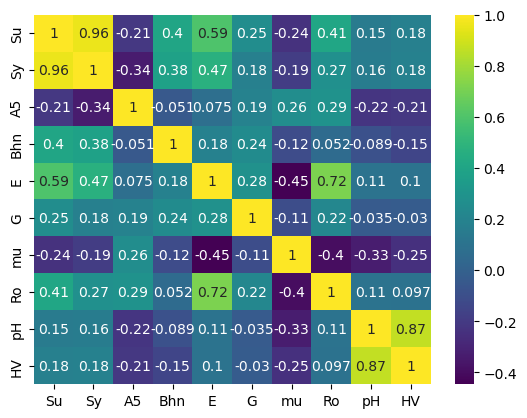

In [26]:
sns.heatmap(df_corr_pearson, cmap = 'viridis', annot = True)

teste de hipóteses

In [27]:
res = stt.normaltest(df_numeros)

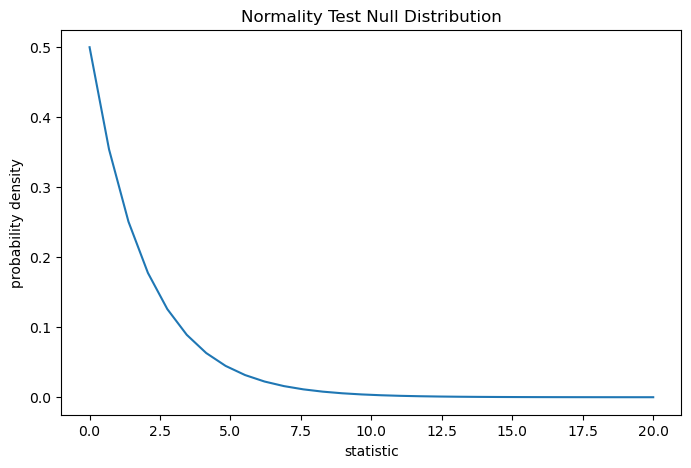

In [31]:
dist = stt.chi2(df=2)
stat_vals = np.linspace(0, 20, 30)
pdf = dist.pdf(stat_vals)

fig, ax = plt.subplots(figsize=(8, 5))

def plot(ax):  # we'll re-use this
    ax.plot(stat_vals, pdf)
    ax.set_title("Normality Test Null Distribution")
    ax.set_xlabel("statistic")
    ax.set_ylabel("probability density")
plot(ax)

plt.show()

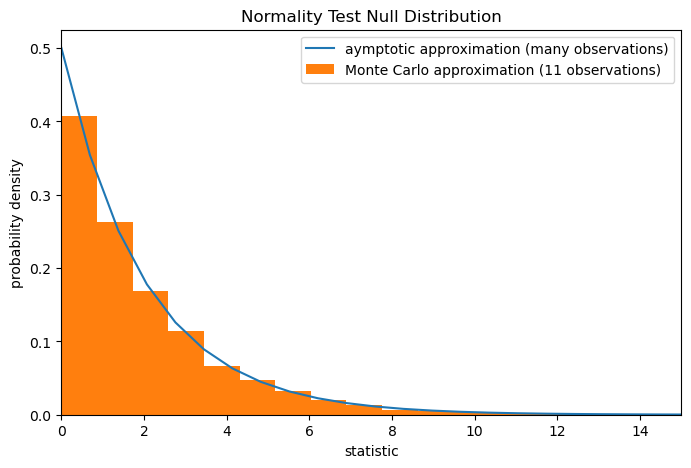

In [32]:
def statistic(df_numeros, axis):
    # Get only the `normaltest` statistic; ignore approximate p-value
    return stt.normaltest(df_numeros, axis=axis).statistic
res = stt.monte_carlo_test(df_numeros, stt.norm.rvs, statistic,
                             alternative='greater')
fig, ax = plt.subplots(figsize=(8, 5))
plot(ax)
ax.hist(res.null_distribution, np.linspace(0, 25, 30),
        density=True)
ax.legend(['aymptotic approximation (many observations)',
           'Monte Carlo approximation (11 observations)'])
ax.set_xlim(0, 15)
plt.show()

In [33]:
res.pvalue

array([0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
       0.0001, 0.0001])

In [ ]:
sns.set_theme(style = 'ticks')

f, ax = plt.subplots(figsize = (8,8))

sns.boxplot(data = df_material,
            x = 'E', y = 'Tratamento',
             palette = 'viridis', width = 0.6,
             showcaps = True, flierprops = {"marker": "*"},
             medianprops = {"color": "coral"})

ax.xaxis.grid(True)
ax.set(xlabel = 'Módulo de Young (MPA)')
ax.set(ylabel = 'Tratamento térmico')
ax.set(title = 'Boxplot do módulo de Young')

plt.show()

In [ ]:
sns.set_theme(style = 'ticks')

f, ax = plt.subplots(figsize = (8,8))

sns.boxplot(data = df_material,
            x = 'Su', y = 'Tratamento',
             palette = 'viridis', width = 0.6,
             showcaps = True, flierprops = {"marker": "*"},
             medianprops = {"color": "coral"})

ax.xaxis.grid(True)
ax.set(xlabel = 'Tensão de ruptura(MPA)')
ax.set(ylabel = 'Tratamento térmico')
ax.set(title = 'Boxplot Tensão de ruptura')

plt.show()

In [ ]:
sns.set_theme(style = 'ticks')

f, ax = plt.subplots(figsize = (8,8))

sns.boxplot(data = df_material,
            x = 'Sy', y = 'Tratamento',
             palette = 'viridis', width = 0.6,
             showcaps = True, flierprops = {"marker": "*"},
             medianprops = {"color": "coral"})

ax.xaxis.grid(True)
ax.set(xlabel = 'Tensão de deformação (MPA)')
ax.set(ylabel = 'Tratamento térmico')
ax.set(title = 'Boxplot tensão de deformação')

plt.show()

In [ ]:
sns.set_theme(style = 'ticks')

f, ax = plt.subplots(figsize = (8,8))

sns.boxplot(data = df_material,
            x = 'A5', y = 'Tratamento',
             palette = 'viridis', width = 0.6,
             showcaps = True, flierprops = {"marker": "*"},
             medianprops = {"color": "coral"})

ax.xaxis.grid(True)
ax.set(xlabel = 'Deformação máxima (%)')
ax.set(ylabel = 'Tratamento térmico')
ax.set(title = 'Boxplot deformação')

plt.show()

In [ ]:
sns.set_theme(style = 'ticks')

f, ax = plt.subplots(figsize = (8,8))

sns.boxplot(data = df_material,
            x = 'Ro', y = 'Tratamento',
             palette = 'viridis', width = 0.6,
             showcaps = True, flierprops = {"marker": "*"},
             medianprops = {"color": "coral"})

ax.xaxis.grid(True)
ax.set(xlabel = 'Densidade da liga (kgm-3)')
ax.set(ylabel = 'Tratamento térmico')
ax.set(title = 'Boxplot densidade')

plt.show()

In [36]:
#filtrando os dados
df_filtro = df_base[df_base['Tratamento'].map(df_base['Tratamento'].value_counts())>1]

In [37]:
df_filtro['Sy'] = df_filtro['Sy'].str.replace(' max', '').astype(int)

/var/folders/jj/2kqphd8j77s7crw7lss83s5w0000gn/T/ipykernel_48566/906540514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtro['Sy'] = df_filtro['Sy'].str.replace(' max', '').astype(int)


In [38]:
df_mf = df_filtro
df_mf = df_mf.drop_duplicates(keep='first')
df_mf['Material'] = df_mf[['Std', 'Material']].fillna('').agg(' '.join, axis = 1)
df_mf.drop(['Desc','ID', 'Material', 'Std'], axis = 1, inplace = True)
df_mf.fillna(0, inplace=True)
df_mf.head(5)

,Tratamento,Su,Sy,A5,Bhn,E,G,mu,Ro,pH,HV
0,as-rolled,421,314,39.0,126.0,207000,79000,0.3,7860,0.0,0.0
1,normalized,424,324,37.0,121.0,207000,79000,0.3,7860,0.0,0.0
2,annealed,386,284,37.0,111.0,207000,79000,0.3,7860,0.0,0.0
3,as-rolled,448,331,36.0,143.0,207000,79000,0.3,7860,0.0,0.0
4,normalized,441,346,35.8,131.0,207000,79000,0.3,7860,550.0,0.0


/Volumes/Dados_1/Aplicativos/anaconda3/envs/tcc_dsa/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


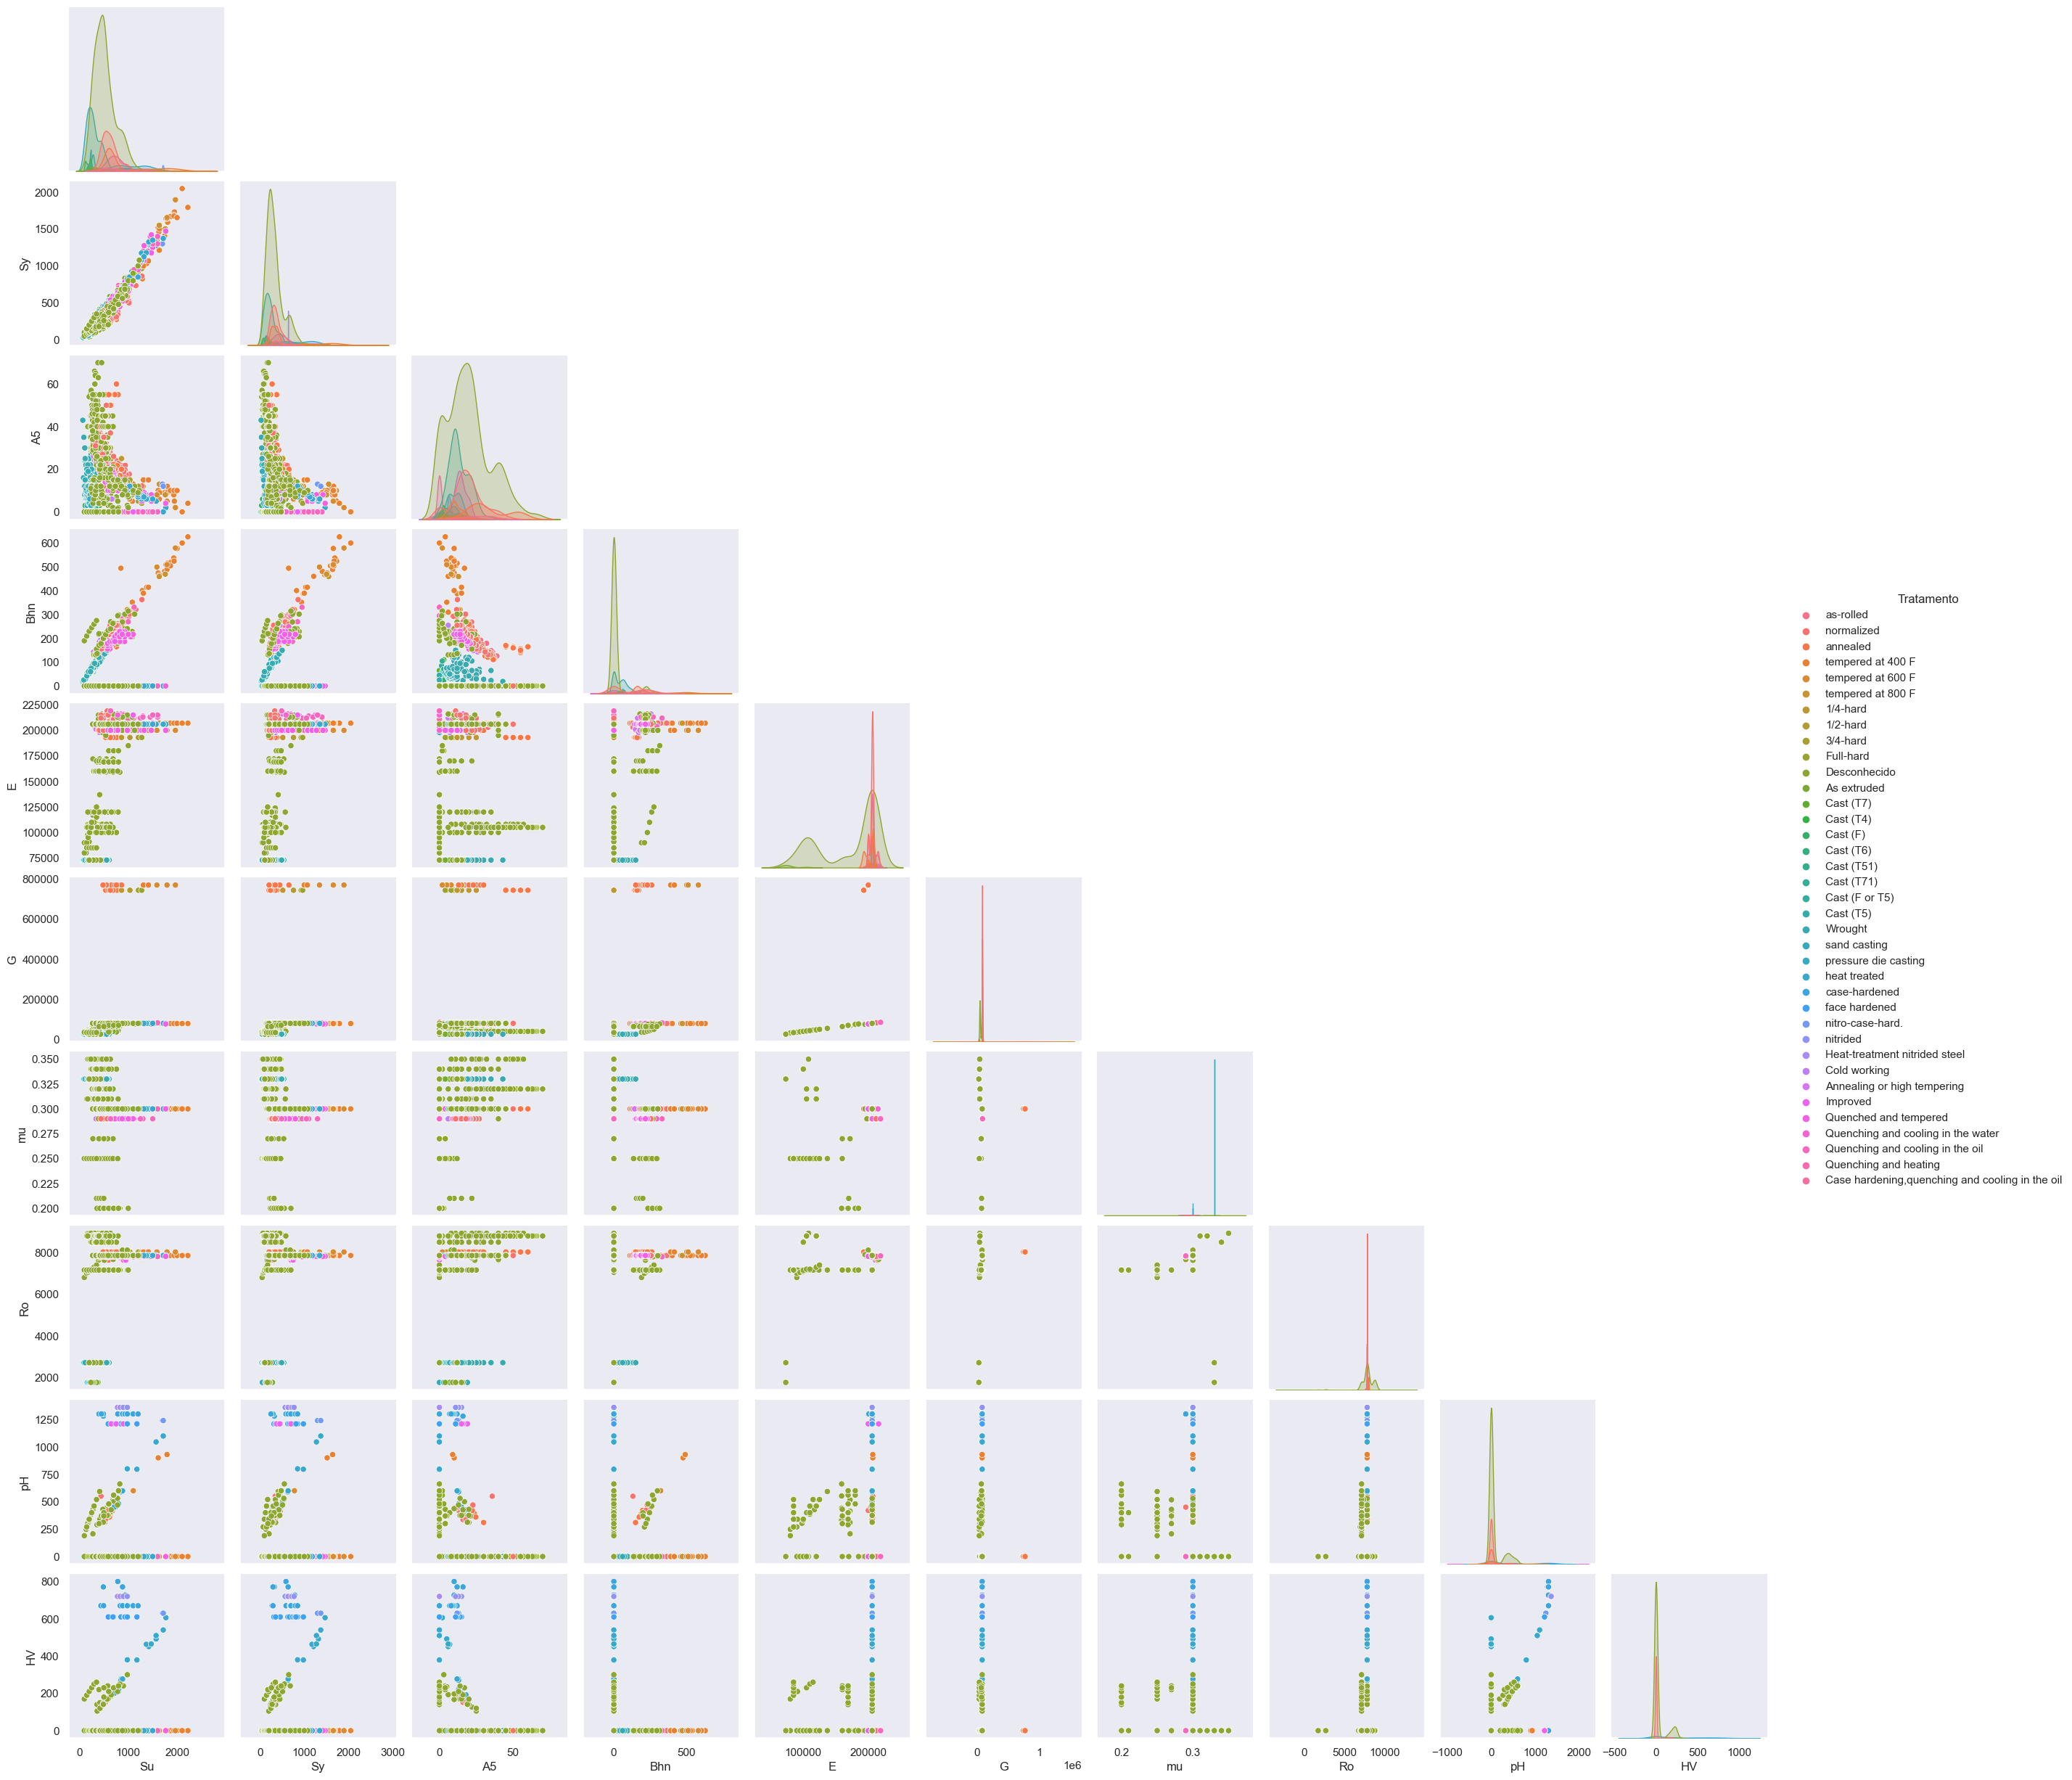

In [39]:
sns.set_theme(style = 'dark')

sns.pairplot(df_mf, hue = 'Tratamento', corner=True)

plt.show()

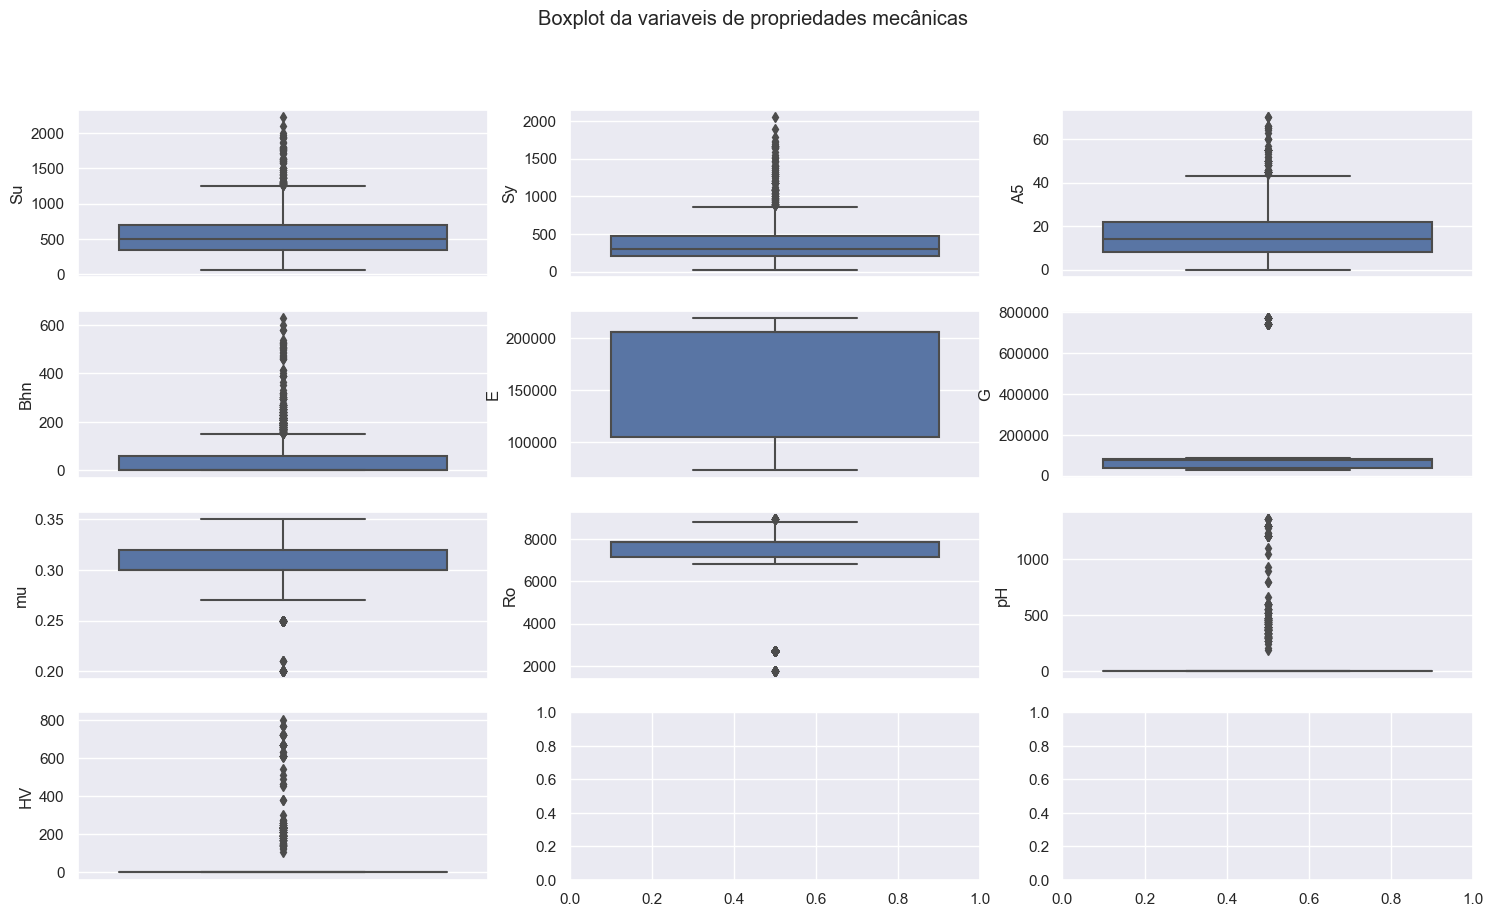

In [ ]:
sns.set_theme(style='darkgrid')

f, axes = plt.subplots(4,3, figsize=(18,10))

f.suptitle('Boxplot da variaveis de propriedades mecânicas')

sns.boxplot(data = df_mf, y='Su', ax=axes[0,0])
sns.boxplot(data = df_mf, y='Sy', ax=axes[0,1])
sns.boxplot(data = df_mf, y='A5', ax=axes[0,2])
sns.boxplot(data = df_mf, y='Bhn', ax=axes[1,0])
sns.boxplot(data = df_mf, y='E', ax=axes[1,1])
sns.boxplot(data = df_mf, y='G', ax=axes[1,2])
sns.boxplot(data = df_mf, y='mu', ax=axes[2,0])
sns.boxplot(data = df_mf, y='Ro', ax=axes[2,1])
sns.boxplot(data = df_mf, y='pH', ax=axes[2,2])
sns.boxplot(data = df_mf, y='HV', ax=axes[3,0])

plt.show()

In [ ]:
sns.set_theme(style='darkgrid')

f, axes = plt.subplots(2,2, figsize=(18,10))

f.suptitle('Boxplot da variaveis de propriedades mecânicas')

sns.histplot(data = df_material_tratado, x='Su', ax=axes[0,0])
sns.histplot(data = df_material_tratado, x='Sy', ax=axes[0,1])
sns.histplot(data = df_material_tratado, x='E', ax=axes[1,0])
sns.histplot(data = df_material_tratado, x='Ro', ax=axes[1,1])

plt.show()

In [42]:
#teste de normalidade shapirowilkes
rest = stt.shapiro(df_numeros)

/Volumes/Dados_1/Aplicativos/anaconda3/envs/tcc_dsa/lib/python3.9/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [45]:
rest.pvalue

0.0

Tratando os outliers

In [46]:
#IQR metodo

# para a tensão de ruptura Su 
quantil1, quantil3 = np.percentile(df_material_tratado.Su, [25,75])
quantil1sy, quantil3sy = np.percentile(df_material_tratado.Sy, [25,75])


print('Su: ',quantil1, quantil3, 'Sy: ', quantil1sy, quantil3sy)

Su:  340.0 705.0 Sy:  205.0 470.0


In [47]:
IQR_valorsu = quantil3-quantil1
IQR_valorsy = quantil3sy-quantil1sy


lsu = quantil1-(1.5*IQR_valorsu)
asu = quantil3+(1.5*IQR_valorsu)

lsy = quantil1sy-(1.5*IQR_valorsy)
asy = quantil3sy+(1.5*IQR_valorsy)


print('Su: ', IQR_valorsu, lsu, asu)
print('Sy: ', IQR_valorsy, lsy, asy)

Su:  365.0 -207.5 1252.5
Sy:  265.0 -192.5 867.5


In [48]:
#separando os outliers
df_material_l = df_material_tratado[(df_material_tratado['Su'] >= lsu) & (df_material_tratado['Su'] <= asu) &
                                    (df_material_tratado['Sy'] >= lsy) & (df_material_tratado['Sy'] <= asy)] 
print(len(df_material_l))
df_material_l.head(3)

1454


,Std,Su,Sy,A5,Bhn,E,G,mu,Ro,pH,HV
0,ANSI ANSI Steel SAE 1015 as-rolled,421,314,39.0,126.0,207000,79000,0.3,7860,0.0,0.0
1,ANSI ANSI Steel SAE 1015 normalized,424,324,37.0,121.0,207000,79000,0.3,7860,0.0,0.0
2,ANSI ANSI Steel SAE 1015 annealed,386,284,37.0,111.0,207000,79000,0.3,7860,0.0,0.0


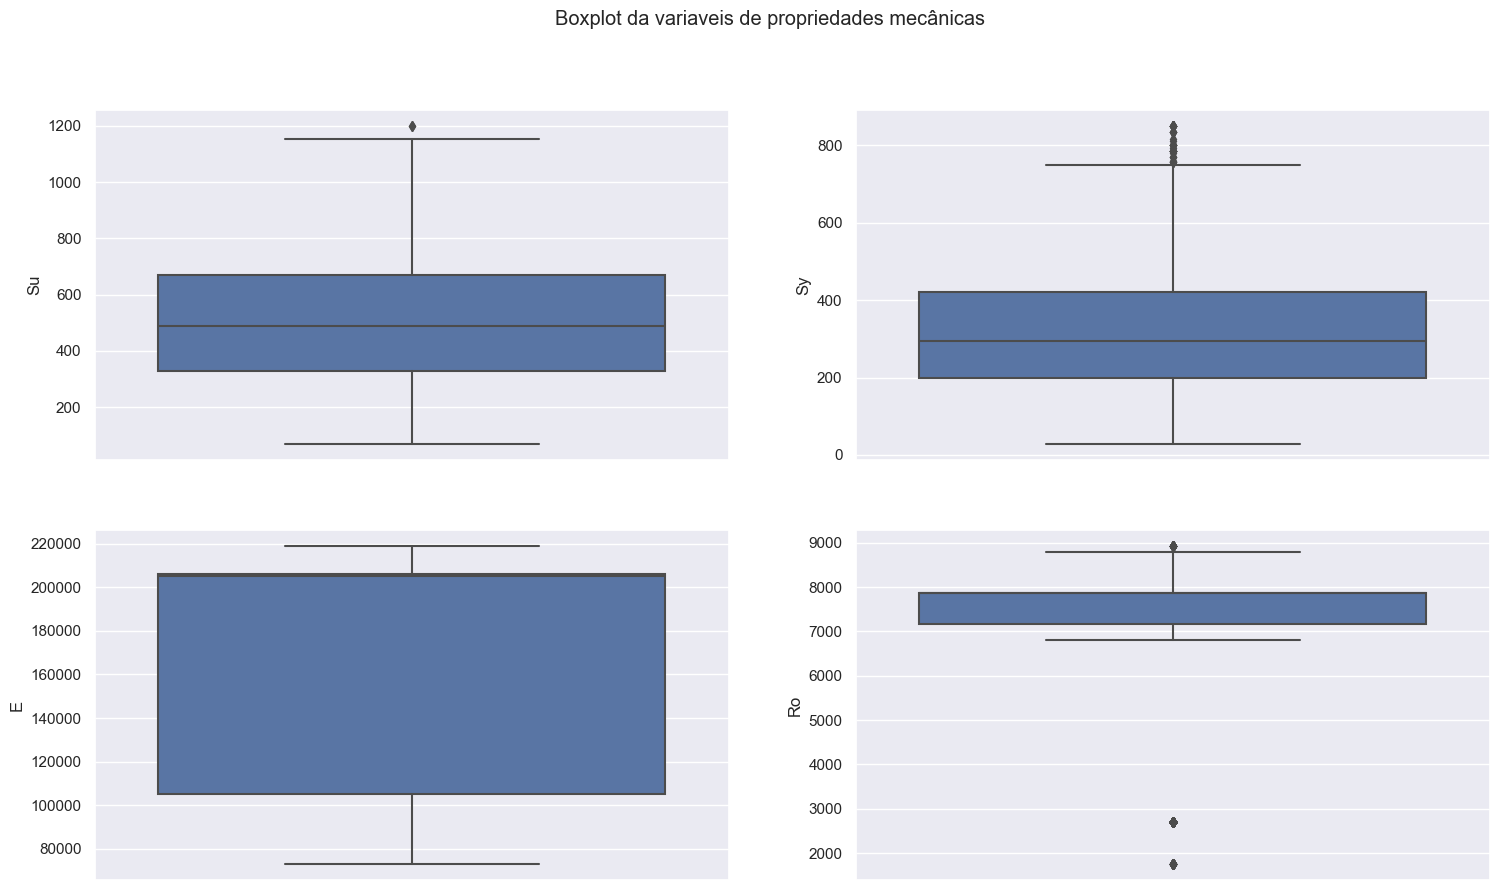

In [49]:
sns.set_theme(style='darkgrid')

f, axes = plt.subplots(2,2, figsize=(18,10))

f.suptitle('Boxplot da variaveis de propriedades mecânicas')

sns.boxplot(data = df_material_l, y='Su', ax=axes[0,0])
sns.boxplot(data = df_material_l, y='Sy', ax=axes[0,1])
sns.boxplot(data = df_material_l, y='E', ax=axes[1,0])
sns.boxplot(data = df_material_l, y='Ro', ax=axes[1,1])

plt.show()

In [54]:
#transformação box-cox
xt, lmbda = stt.boxcox(df_material_l.Su)
xt1, lmbda1 = stt.boxcox(df_material_l.Sy)

In [55]:
nrest= stt.shapiro(xt)
print(nrest)

ShapiroResult(statistic=0.9899526834487915, pvalue=1.9174173360170244e-08)


In [57]:
nrest2=stt.shapiro(xt1)
print(nrest2)

ShapiroResult(statistic=0.9923611879348755, pvalue=7.567770694549836e-07)


/Volumes/Dados_1/Aplicativos/anaconda3/envs/tcc_dsa/lib/python3.9/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)
/Volumes/Dados_1/Aplicativos/anaconda3/envs/tcc_dsa/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Volumes/Dados_1/Aplicativos/anaconda3/envs/tcc_dsa/lib/python3.9/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/Volumes/Dados_1/Aplicativos/anaconda3/envs/tcc_dsa/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Volumes/Dados_1/Aplicativos/anaconda3/envs/tcc_dsa/lib/python3.9/sit

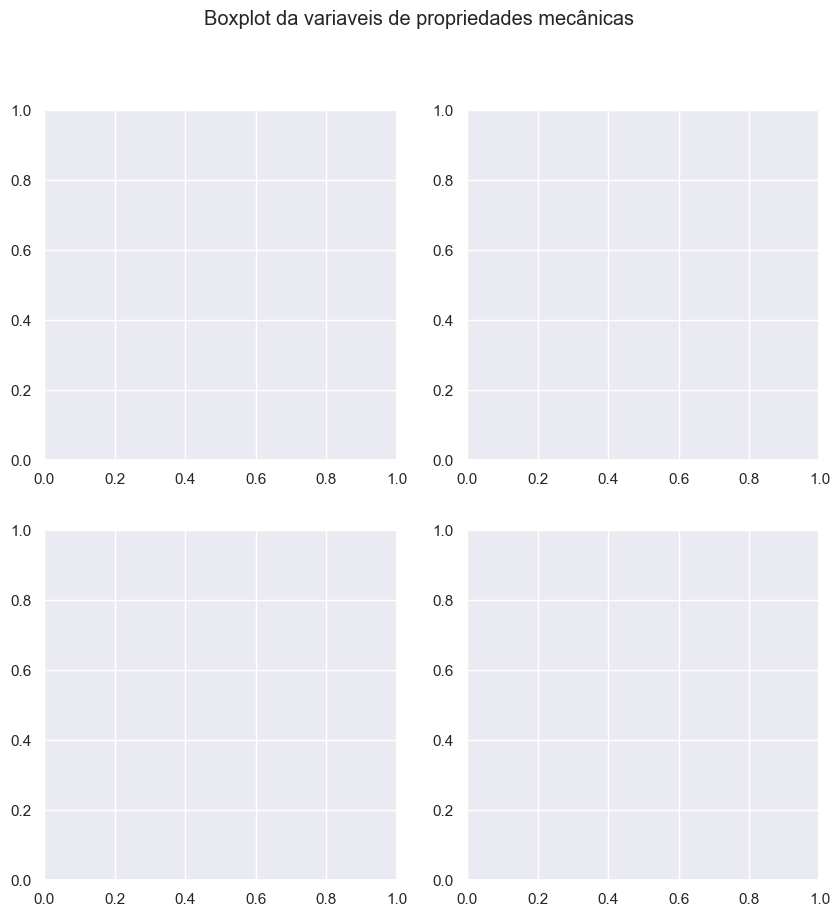

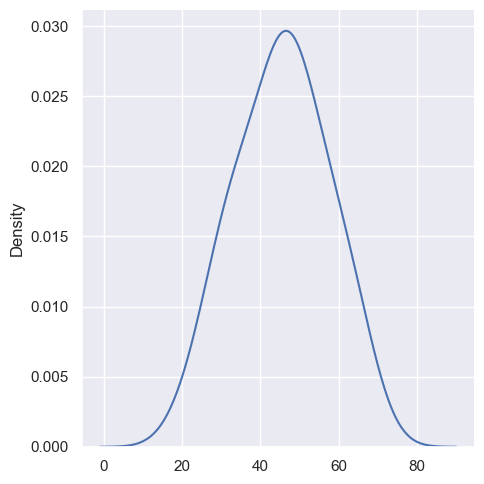

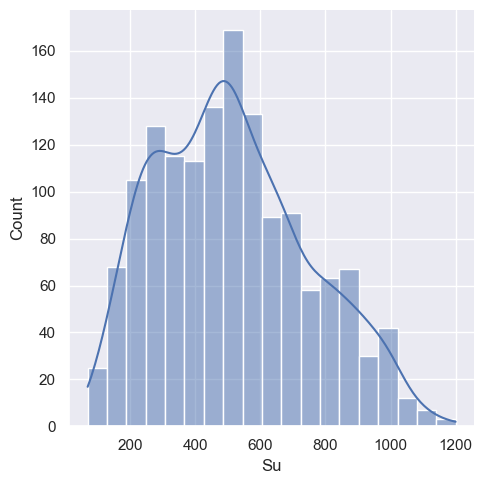

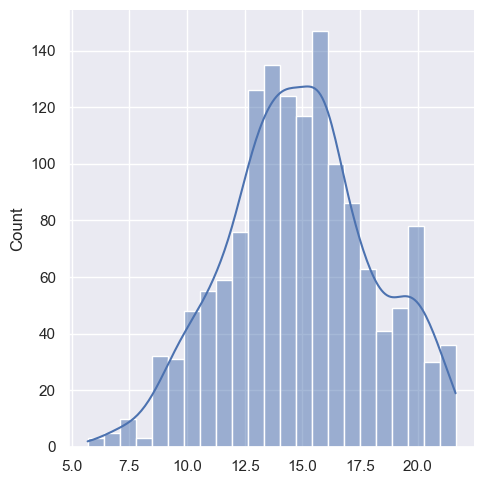

In [58]:
sns.set_theme(style='darkgrid')

f, axes = plt.subplots(2,2, figsize=(10,10))

f.suptitle('Boxplot da variaveis de propriedades mecânicas')

sns.displot(xt, kind= 'kde', bw_adjust =2,  ax=axes[0,0])
sns.displot(df_material_l.Su, kde = True, ax=axes[0,1])
sns.displot(xt1, kde= True, ax=axes[1,0])

plt.show()

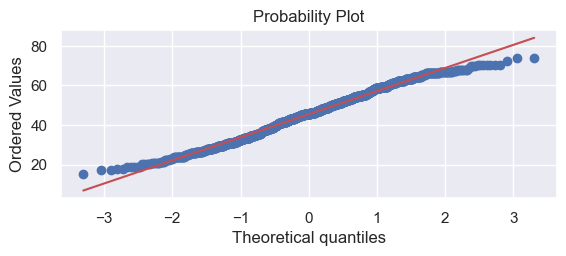

In [61]:
fig = plt.figure()
ax2= fig.add_subplot(212)
prob = stt.probplot(xt, dist=stt.norm, plot=ax2)
plt.show()

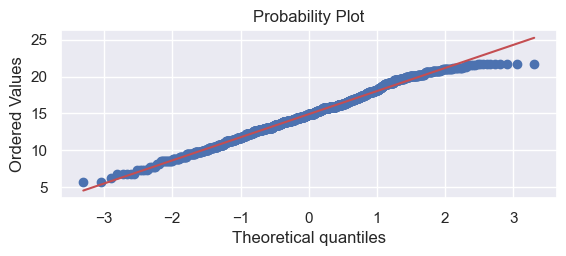

In [63]:
fig = plt.figure()
ax2= fig.add_subplot(212)
prob = stt.probplot(xt1, dist=stt.norm, plot=ax2)
plt.show()

In [64]:
#salvando o arquivo para machine learning
df_material_l.to_csv('df_metal_PCA.csv', index=False)
df_base.to_csv('df_metal_ML.csv', index = False)